# SOLAR RADIATION PREDICTION ANALYSIS PROJECT

PROJECT MEMBERS :
 1. Swapnil Taware (BE Mechanical)
 2. Amit Yadav (BE Electrical)
 3. Anup Yelple(BE Electrical)
 4. Nishant Gaikwad (BE Mechanical)
 
Under the Guidaance of

    Traineer's Name: Mrs. Amrita Helwade

# Project  Description:
Solar Prediction Analysis : "Analyzing Solar radition based on Temperature,Pressure,Humidity,WindDirection,Speed,SunRise & SunSet Time
""
1. Cleaning and Preprocessing the Solar Prediction Data.
2. Done Feature Engineering on data and drop unnecessary column. Plot the Pairplot w.r.t Radiation vs Temperature,Pressure,Huminity.
3.To Plot Heat map we splitting and scaling the data and we plot the Box plot graph for finding out the outliers in the dataset.
4. Implementation of ML algorithm for classification of data done Train_test split & prediction( linear Regression).
5. Implementation of Boosting Technique (XGBOOST)
6. Time series analysis on Radiation and Datetime ,Month.Implementation of Seasonal Decomposition, SARIMAX Model.
7. Clustering(K-Means and Hierarchical Clustering).
8. Evaluation of the models.

# AIM
Solar Prediction Analysis for predict the hourly and Monthly Radiation effect on the Hawai as per weather parameter like Humidity, Temperature, Wind direction, wind Speed And Sunset/Sunrise Time.

Firstly we have imported all the Libraries and packages we'll require for this project.

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import metrics

import xgboost as xgb
import optuna

import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

We are importing our data to be analysed.

In [2]:
solar_radiation = pd.read_csv(r"C:\Users\Swapnil\Downloads\downloaded project datasets\SolarPrediction.csv")

In [3]:
data = solar_radiation

In [4]:
df = data

In [5]:
pd.options.display.max_rows=15000

The units of each dataset are:

    Solar radiation: watts per meter^2

    Temperature: degrees Fahrenheit

    Humidity: percent

    Barometric pressure: Hg

    Wind direction: degrees

    Wind speed: miles per hour

    Sunrise/sunset: "Hawaii" time

In [6]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


We are using shape function for checking attributes and features of data.

In [7]:
data.shape                                                        

(32686, 11)

our data has 32686 attributes(rows) and 11 features(columns)

In [8]:
data.columns                      

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'],
      dtype='object')

In [7]:
#data.dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [8]:
data.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


Checking null values in the data set

In [11]:
print("Total missing values:", data.isna().sum())

Total missing values: UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64


## Feature Engineering

In [14]:
data['Month'] = pd.to_datetime(data.Data).dt.month.astype(np.int)

C:\Users\Swapnil\AppData\Local\Temp/ipykernel_7456/3275581446.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['Month'] = pd.to_datetime(data.Data).dt.month.astype(np.int)


In [15]:
data['Day'] = pd.to_datetime(data.Data).dt.day.astype(np.int)

C:\Users\Swapnil\AppData\Local\Temp/ipykernel_7456/234670999.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['Day'] = pd.to_datetime(data.Data).dt.day.astype(np.int)


In [16]:
data['Year'] = pd.to_datetime(data.Data).dt.year.astype(np.int)

C:\Users\Swapnil\AppData\Local\Temp/ipykernel_7456/1511827949.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['Year'] = pd.to_datetime(data.Data).dt.year.astype(np.int)


In [17]:
data = data.drop('Data', axis=1)

In [18]:
##data.drop(['day'],axis = 1, inplace = True)

In [19]:
data['Hour'] = pd.to_datetime(data.Time).dt.hour.astype(np.int)
data['Minute'] = pd.to_datetime(data.Time).dt.minute.astype(np.int)
data['Second'] = pd.to_datetime(data.Time).dt.second.astype(np.int)

C:\Users\Swapnil\AppData\Local\Temp/ipykernel_7456/360697051.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['Hour'] = pd.to_datetime(data.Time).dt.hour.astype(np.int)
C:\Users\Swapnil\AppData\Local\Temp/ipykernel_7456/360697051.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current

In [20]:
data = data.drop('Time', axis=1)

In [21]:
data['SunriseHour'] = pd.to_datetime(data.TimeSunRise).dt.hour.astype(np.int)
data['SunriseMinute'] = pd.to_datetime(data.TimeSunRise).dt.minute.astype(np.int)

data['SunsetHour'] = pd.to_datetime(data.TimeSunSet).dt.hour.astype(np.int)
data['SunsetMinute'] = pd.to_datetime(data.TimeSunSet).dt.minute.astype(np.int)

C:\Users\Swapnil\AppData\Local\Temp/ipykernel_7456/549316017.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['SunriseHour'] = pd.to_datetime(data.TimeSunRise).dt.hour.astype(np.int)
C:\Users\Swapnil\AppData\Local\Temp/ipykernel_7456/549316017.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revie

In [22]:
data = data.drop(['TimeSunRise','TimeSunSet'], axis=1)

Now we'll look for the names of the columns of the dataset using pd.columns

In [23]:
data.columns

Index(['UNIXTime', 'Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'Month', 'Day', 'Year', 'Hour',
       'Minute', 'Second', 'SunriseHour', 'SunriseMinute', 'SunsetHour',
       'SunsetMinute'],
      dtype='object')

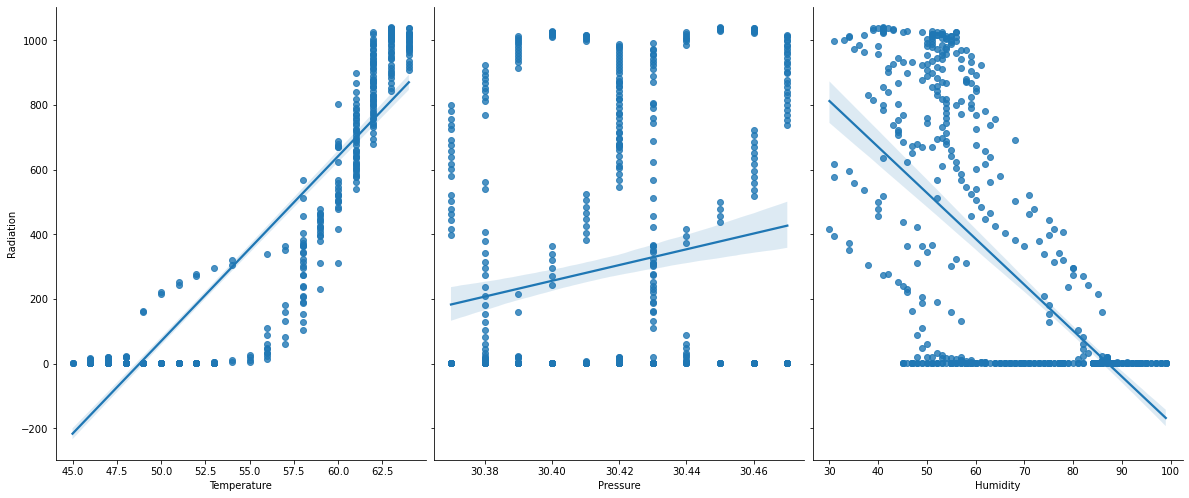

In [24]:
sns.pairplot(data.head(600),
            x_vars=["Temperature","Pressure","Humidity"],
            y_vars="Radiation",
            height=7,
            aspect=0.8,
            kind='reg')

In Temperature vs Radiation graph - we found that both the parameters are corresponding to each other, increasing in temperature Radiation is also increasing.

But in Pressure vs Radiation Graph No such relation is formed.

In Humidity vs Radiation - Radiation is maximum where Humidity is low.

In [25]:
data.corr()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Year,Hour,Minute,Second,SunriseHour,SunriseMinute,SunsetHour,SunsetMinute
UNIXTime,1.000000,-0.081286,-0.369169,-0.332016,-0.063117,0.152613,0.173860,0.968235,0.286457,NaN,0.001056,0.000406,0.231002,NaN,0.981908,-0.818884,0.586612
Radiation,-0.081286,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627,-0.095450,0.039978,NaN,0.004398,-0.000730,-0.031270,NaN,-0.092850,0.048719,-0.039816
Temperature,-0.369169,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458,-0.354560,-0.123705,NaN,0.197464,-0.001934,-0.036147,NaN,-0.380968,0.300920,-0.242881
Pressure,-0.332016,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639,-0.341759,-0.024633,NaN,0.091069,0.001860,-0.031102,NaN,-0.380399,0.151939,-0.119599
Humidity,-0.063117,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624,-0.068854,0.014637,NaN,0.077899,0.000499,-0.027682,NaN,-0.023955,0.145143,-0.119526
WindDirection(Degrees),0.152613,-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092,0.181485,-0.082354,NaN,-0.077969,-0.000602,-0.032568,NaN,0.176929,-0.078540,0.070030
Speed,0.173860,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000,0.150822,0.117337,NaN,-0.057939,0.000192,-0.032934,NaN,0.167075,-0.159384,0.119926
Month,0.968235,-0.095450,-0.354560,-0.341759,-0.068854,0.181485,0.150822,1.000000,0.038027,NaN,-0.005396,0.000168,0.220563,NaN,0.952472,-0.784783,0.541883
Day,0.286457,0.039978,-0.123705,-0.024633,0.014637,-0.082354,0.117337,0.038027,1.000000,NaN,-0.008010,-0.000196,0.089078,NaN,0.274522,-0.263575,0.265662
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
## In year column there is only one value 2016 so it gives mean standard daviation 0
data=data.drop('Year', axis=1)

In [27]:
data['SunriseHour'].unique()

array([6])

In [28]:
data = data.drop('SunriseHour', axis=1)

## Splitting/Scaling

In [29]:
y = data['Radiation'].copy()
x = data.drop('Radiation',axis = 1).copy()

Our data is having high variation so StandardScaler is used to resize the distribution of values 

so that the mean of the observed values is 0 and the standard deviation is 1

In [30]:
scaler = StandardScaler()

scale_data = scaler.fit_transform(x)

In [31]:
scale_data = pd.DataFrame(scale_data)

In [32]:
scale_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.937753,-0.500439,0.678974,-0.616253,0.407620,-0.178738,-1.391540,1.512248,1.655482,1.589236,0.660811,-0.943425,1.369126,-1.525765
1,-0.937854,-0.500439,0.678974,-0.654730,0.400285,-0.823359,-1.391540,1.512248,1.655482,1.299687,0.429167,-0.943425,1.369126,-1.525765
2,-0.937953,-0.500439,0.678974,-0.693206,0.183490,-0.823359,-1.391540,1.512248,1.655482,1.010138,0.660811,-0.943425,1.369126,-1.525765
3,-0.938054,-0.500439,0.678974,-0.577776,-0.069497,-0.823359,-1.391540,1.512248,1.655482,0.720589,0.274737,-0.943425,1.369126,-1.525765
4,-0.938153,-0.500439,0.678974,-0.500823,-0.463407,-0.178738,-1.391540,1.512248,1.655482,0.431040,0.506381,-0.943425,1.369126,-1.525765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,0.845373,-1.145490,0.130250,1.038241,0.023209,0.145006,1.344003,-1.701824,-1.672098,-0.437606,-1.037912,0.860876,-0.730393,0.293766
32682,0.845273,-1.145490,-0.052658,1.038241,-0.309138,0.145006,1.344003,-1.701824,-1.672098,-0.727155,-1.269556,0.860876,-0.730393,0.293766
32683,0.845173,-1.145490,-0.052658,1.038241,0.020443,0.789627,1.344003,-1.701824,-1.672098,-1.016704,-1.269556,0.860876,-0.730393,0.293766
32684,0.845073,-1.145490,-0.052658,0.999764,0.248901,0.465884,1.344003,-1.701824,-1.672098,-1.306253,-1.192341,0.860876,-0.730393,0.293766


<AxesSubplot:>

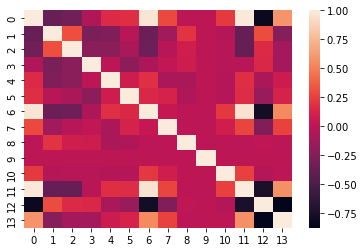

In [33]:
plt.figure(figsize=(6,4))
sns.heatmap(scale_data.corr()) 

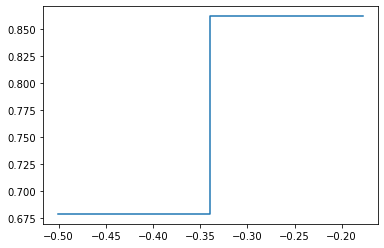

In [34]:
plt.plot(scale_data[1].head(20), scale_data[2].head(20))

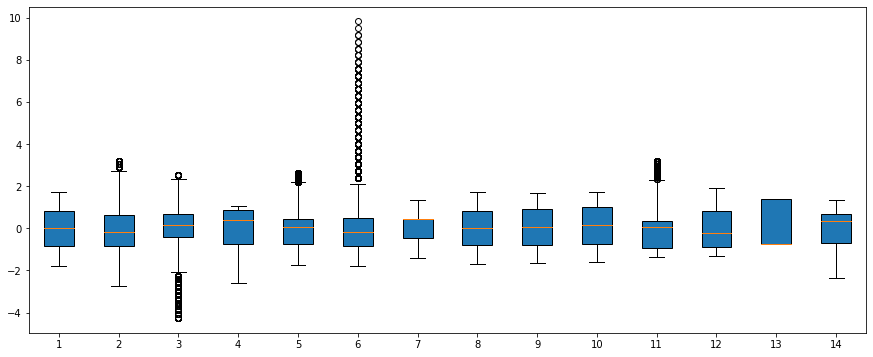

In [35]:
fig = plt.figure(1, figsize=(15,6))

ax = fig.add_subplot(111)
bp = ax.boxplot(scale_data, patch_artist=True)

Above Boxplot shows the outliers present in the data

For finding outliers we've used IQR(Inter Quartile Range) method.

In [36]:
l1 = scale_data.quantile(0.25)
l1

0    -0.832205
1    -0.822965
2    -0.418473
3    -0.731683
4    -0.736625
5    -0.823359
6    -0.479692
7    -0.783518
8    -0.804034
9    -0.727155
10   -0.960697
11   -0.878986
12   -0.730393
13   -0.710113
Name: 0.25, dtype: float64

In [37]:
h1 = scale_data.quantile(0.75)
h1

0     0.809608
1     0.628400
2     0.678974
3     0.845858
4     0.430706
5     0.465884
6     0.432155
7     0.823518
8     0.932095
9     1.010138
10    0.351952
11    0.796437
12    1.369126
13    0.670221
Name: 0.75, dtype: float64

In [38]:
IQR = h1-l1
IQR

0     1.641812
1     1.451364
2     1.097448
3     1.577541
4     1.167331
5     1.289243
6     0.911848
7     1.607036
8     1.736129
9     1.737293
10    1.312649
11    1.675422
12    2.099519
13    1.380334
dtype: float64

In [39]:
LB = l1 - 1.5*IQR
LB

0    -3.294923
1    -3.000011
2    -2.064645
3    -3.097994
4    -2.487621
5    -2.757224
6    -1.847463
7    -3.194072
8    -3.408228
9    -3.333095
10   -2.929670
11   -3.392119
12   -3.879671
13   -2.780614
dtype: float64

In [40]:
UB = h1 + 1.5*IQR
UB

0     3.272326
1     2.805446
2     2.325145
3     3.212169
4     2.181702
5     2.399749
6     1.799927
7     3.234072
8     3.536289
9     3.616078
10    2.320925
11    3.309570
12    4.518404
13    2.740722
dtype: float64

In [48]:
#scale_data[scale_data < LB]

In [49]:
#scale_data[scale_data > UB]

In [41]:
var = scale_data[(scale_data < LB) | (scale_data > UB)].index
var

RangeIndex(start=0, stop=32686, step=1)

In [42]:
without_outlier = scale_data.drop(index=var)
without_outlier

,0,1,2,3,4,5,6,7,8,9,10,11,12,13


## train_test_split

splitting x and y into training and testing sets

random_state select data randomely and freez/fix it to entire analysis

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=100, train_size = 0.7)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=200, train_size = 0.8)

In [45]:
print('Size of x_train:',x_train.shape[0])
print('Size of x_val:',x_val.shape[0])
print('Size of x_test:',x_test.shape[0])

Size of x_train: 18304
Size of x_val: 4576
Size of x_test: 9806


# LinearRegression

Linear Regression is a machine learning algorithm based on supervised learning

Reason for choosing Linear regression

1. Linear relationship and data is continuous.
2. No or little multicollinearity.
3. No autocorrelation

In [46]:
linreg = LinearRegression()

In [47]:
linreg = linreg.fit(x_train, y_train)

In [48]:
y_pred = linreg.predict(x_test)
y_pred

array([  72.13372087, -228.14066218,  117.6368593 , ...,  137.49005509,
        -44.0111195 ,  216.75232338])

r2_score = 1- (RSS / TSS)

RSS- residual sum of squares

TSS- total sum of squares

In [49]:
metrics.r2_score(y_test, y_pred)

0.6313621786547534

In [50]:
metrics.mean_absolute_error(y_test, y_pred)

146.18566616387497

In [51]:
metrics.mean_squared_error(y_test, y_pred)

36866.21322174484

# XGBoost Training

Our r2_score for linear regression is 0.6313.

So we have to use boosting technique on this data.

In [59]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dval = xgb.DMatrix(x_val, label=y_val)
dtest = xgb.DMatrix(x_test, label=y_test)

In [60]:
def get_model_rmse(params):
    model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dval, 'eval')], early_stopping_rounds=10)
    results = model.eval(dtest)
    rmse = float(re.search(r'[\d.]+$', results).group(0))
    return rmse

In [61]:
def objective(trial):
    learning_rate = trial.suggest_loguniform('learning_rate', 0.00001, 10.0)
    max_depth = trial.suggest_int('max_depth', 4, 8)
    l1_reg = trial.suggest_loguniform('l1_reg', 0.00001, 10.0)
    l2_reg = trial.suggest_loguniform('l2_reg', 0.00001, 10.0)
    
    params = {'learning_rate':learning_rate, 'max_depth':max_depth, 'alpha':l1_reg, 'lambda':l2_reg}
    
    return get_model_rmse(params)

In [62]:
study = optuna.create_study()
study.optimize(objective, n_trials=100, show_progress_bar=True)

[I 2022-09-16 00:08:22,891] A new study created in memory with name: no-name-457e2248-df1f-480f-91a1-6150d174f586
C:\Users\Swapnil\anaconda3\lib\site-packages\optuna\progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

[0]	eval-rmse:376.06470
[1]	eval-rmse:370.75150
[2]	eval-rmse:365.68145
[3]	eval-rmse:360.56027
[4]	eval-rmse:355.54584
[5]	eval-rmse:350.72919
[6]	eval-rmse:345.89422
[7]	eval-rmse:341.13401
[8]	eval-rmse:336.48748
[9]	eval-rmse:331.92892
[10]	eval-rmse:327.48300
[11]	eval-rmse:323.20884
[12]	eval-rmse:318.92756
[13]	eval-rmse:314.61478
[14]	eval-rmse:310.45021
[15]	eval-rmse:306.26982
[16]	eval-rmse:302.33925
[17]	eval-rmse:298.37979
[18]	eval-rmse:294.58901
[19]	eval-rmse:290.82275
[20]	eval-rmse:287.03360


C:\Users\Swapnil\AppData\Local\Temp/ipykernel_22496/3826600089.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.00001, 10.0)
C:\Users\Swapnil\AppData\Local\Temp/ipykernel_22496/3826600089.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  l1_reg = trial.suggest_loguniform('l1_reg', 0.00001, 10.0)
C:\Users\Swapnil\AppData\Local\Temp/ipykernel_22496/3826600089.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  l

[21]	eval-rmse:283.55253
[22]	eval-rmse:280.09835
[23]	eval-rmse:276.51593
[24]	eval-rmse:273.18075
[25]	eval-rmse:269.74573
[26]	eval-rmse:266.44758
[27]	eval-rmse:263.16363
[28]	eval-rmse:260.07800
[29]	eval-rmse:256.97613
[30]	eval-rmse:253.89749
[31]	eval-rmse:251.00011
[32]	eval-rmse:248.05970
[33]	eval-rmse:245.27835
[34]	eval-rmse:242.48963
[35]	eval-rmse:239.70969
[36]	eval-rmse:236.96404
[37]	eval-rmse:234.26564
[38]	eval-rmse:231.63007
[39]	eval-rmse:229.04032
[40]	eval-rmse:226.51093
[41]	eval-rmse:224.11788
[42]	eval-rmse:221.61022
[43]	eval-rmse:219.31174
[44]	eval-rmse:216.90811
[45]	eval-rmse:214.71147
[46]	eval-rmse:212.43754
[47]	eval-rmse:210.33632
[48]	eval-rmse:208.13255
[49]	eval-rmse:206.14205
[50]	eval-rmse:204.03540
[51]	eval-rmse:202.06407
[52]	eval-rmse:200.04863
[53]	eval-rmse:198.16719
[54]	eval-rmse:196.29431
[55]	eval-rmse:194.49880
[56]	eval-rmse:192.72943
[57]	eval-rmse:190.98812
[58]	eval-rmse:189.29369
[59]	eval-rmse:187.66021
[60]	eval-rmse:186.01440


[18]	eval-rmse:381.32935
[19]	eval-rmse:381.32126
[20]	eval-rmse:381.31318
[21]	eval-rmse:381.30510
[22]	eval-rmse:381.29702
[23]	eval-rmse:381.28894
[24]	eval-rmse:381.28086
[25]	eval-rmse:381.27278
[26]	eval-rmse:381.26470
[27]	eval-rmse:381.25661
[28]	eval-rmse:381.24853
[29]	eval-rmse:381.24045
[30]	eval-rmse:381.23237
[31]	eval-rmse:381.22429
[32]	eval-rmse:381.21621
[33]	eval-rmse:381.20813
[34]	eval-rmse:381.20005
[35]	eval-rmse:381.19197
[36]	eval-rmse:381.18389
[37]	eval-rmse:381.17581
[38]	eval-rmse:381.16774
[39]	eval-rmse:381.15966
[40]	eval-rmse:381.15158
[41]	eval-rmse:381.14350
[42]	eval-rmse:381.13542
[43]	eval-rmse:381.12734
[44]	eval-rmse:381.11926
[45]	eval-rmse:381.11119
[46]	eval-rmse:381.10311
[47]	eval-rmse:381.09504
[48]	eval-rmse:381.08696
[49]	eval-rmse:381.07888
[50]	eval-rmse:381.07081
[51]	eval-rmse:381.06273
[52]	eval-rmse:381.05465
[53]	eval-rmse:381.04658
[54]	eval-rmse:381.03850
[55]	eval-rmse:381.03043
[56]	eval-rmse:381.02236
[57]	eval-rmse:381.01428


[0]	eval-rmse:381.11166
[1]	eval-rmse:380.74084
[2]	eval-rmse:380.37052
[3]	eval-rmse:380.00069
[4]	eval-rmse:379.63135
[5]	eval-rmse:379.26249
[6]	eval-rmse:378.89414
[7]	eval-rmse:378.52626
[8]	eval-rmse:378.15887
[9]	eval-rmse:377.79198
[10]	eval-rmse:377.42557
[11]	eval-rmse:377.05965
[12]	eval-rmse:376.69420
[13]	eval-rmse:376.32924
[14]	eval-rmse:375.96478
[15]	eval-rmse:375.60079
[16]	eval-rmse:375.23729
[17]	eval-rmse:374.87428
[18]	eval-rmse:374.51174
[19]	eval-rmse:374.14969
[20]	eval-rmse:373.78808
[21]	eval-rmse:373.42884
[22]	eval-rmse:373.06818
[23]	eval-rmse:372.70989
[24]	eval-rmse:372.35019
[25]	eval-rmse:371.99285
[26]	eval-rmse:371.63409
[27]	eval-rmse:371.28544
[28]	eval-rmse:370.92765
[29]	eval-rmse:370.57219
[30]	eval-rmse:370.22307
[31]	eval-rmse:369.86853
[32]	eval-rmse:369.52034
[33]	eval-rmse:369.16668
[34]	eval-rmse:368.81170
[35]	eval-rmse:368.46672
[36]	eval-rmse:368.11215
[37]	eval-rmse:367.76036
[38]	eval-rmse:367.41440
[39]	eval-rmse:367.06355
[40]	eval-

[0]	eval-rmse:2466.06465
[1]	eval-rmse:16955.62175
[2]	eval-rmse:116785.10408
[3]	eval-rmse:804366.51798
[4]	eval-rmse:5540178.43311
[5]	eval-rmse:38158657.93593
[6]	eval-rmse:262822473.52882
[7]	eval-rmse:1810222238.59437
[8]	eval-rmse:12468129954.33316
[9]	eval-rmse:85875790756.11525
[I 2022-09-16 00:08:31,827] Trial 10 finished with value: 586089422741.057 and parameters: {'learning_rate': 7.887623748403799, 'max_depth': 5, 'l1_reg': 0.0006027705290656043, 'l2_reg': 1.1303530246584901e-05}. Best is trial 1 with value: 89.35590127365751.
[0]	eval-rmse:156.83532
[1]	eval-rmse:115.62210
[2]	eval-rmse:106.54349
[3]	eval-rmse:103.05641
[4]	eval-rmse:100.50654
[5]	eval-rmse:98.99417
[6]	eval-rmse:98.23223
[7]	eval-rmse:97.90849
[8]	eval-rmse:97.48741
[9]	eval-rmse:97.61340
[10]	eval-rmse:97.29452
[11]	eval-rmse:96.51891
[12]	eval-rmse:96.48563
[13]	eval-rmse:95.20212
[14]	eval-rmse:95.27987
[15]	eval-rmse:95.41750
[16]	eval-rmse:95.51720
[17]	eval-rmse:94.79199
[18]	eval-rmse:94.11856
[19

[77]	eval-rmse:87.56031
[78]	eval-rmse:87.55566
[79]	eval-rmse:87.58681
[80]	eval-rmse:87.63034
[81]	eval-rmse:87.60178
[82]	eval-rmse:87.52714
[83]	eval-rmse:87.51462
[84]	eval-rmse:87.49772
[85]	eval-rmse:87.14736
[86]	eval-rmse:87.11783
[87]	eval-rmse:87.19183
[88]	eval-rmse:87.23082
[89]	eval-rmse:87.19316
[90]	eval-rmse:86.97892
[91]	eval-rmse:86.86336
[92]	eval-rmse:86.88220
[93]	eval-rmse:86.82971
[94]	eval-rmse:86.81819
[95]	eval-rmse:86.86860
[96]	eval-rmse:86.77482
[97]	eval-rmse:86.73944
[98]	eval-rmse:86.67415
[99]	eval-rmse:86.65880
[I 2022-09-16 00:08:34,730] Trial 14 finished with value: 80.08029553742566 and parameters: {'learning_rate': 0.18607027575583682, 'max_depth': 6, 'l1_reg': 0.35600403546092285, 'l2_reg': 0.000245790585604586}. Best is trial 14 with value: 80.08029553742566.
[0]	eval-rmse:358.54529
[1]	eval-rmse:337.63685
[2]	eval-rmse:318.03198
[3]	eval-rmse:300.02951
[4]	eval-rmse:283.44596
[5]	eval-rmse:268.29099
[6]	eval-rmse:254.46112
[7]	eval-rmse:241.426

[55]	eval-rmse:91.36778
[56]	eval-rmse:91.04144
[57]	eval-rmse:90.70470
[58]	eval-rmse:90.37392
[59]	eval-rmse:90.19004
[60]	eval-rmse:89.94127
[61]	eval-rmse:89.74585
[62]	eval-rmse:89.56203
[63]	eval-rmse:89.32831
[64]	eval-rmse:89.16145
[65]	eval-rmse:88.92343
[66]	eval-rmse:88.70217
[67]	eval-rmse:88.57399
[68]	eval-rmse:88.43537
[69]	eval-rmse:88.32015
[70]	eval-rmse:88.21846
[71]	eval-rmse:88.06363
[72]	eval-rmse:87.95432
[73]	eval-rmse:87.79077
[74]	eval-rmse:87.68685
[75]	eval-rmse:87.56072
[76]	eval-rmse:87.54408
[77]	eval-rmse:87.41932
[78]	eval-rmse:87.33435
[79]	eval-rmse:87.25234
[80]	eval-rmse:87.14768
[81]	eval-rmse:87.04051
[82]	eval-rmse:87.03246
[83]	eval-rmse:86.95822
[84]	eval-rmse:86.94185
[85]	eval-rmse:86.89260
[86]	eval-rmse:86.79473
[87]	eval-rmse:86.69091
[88]	eval-rmse:86.55859
[89]	eval-rmse:86.47752
[90]	eval-rmse:86.46093
[91]	eval-rmse:86.38883
[92]	eval-rmse:86.37055
[93]	eval-rmse:86.30545
[94]	eval-rmse:86.29854
[95]	eval-rmse:86.30333
[96]	eval-rmse:8

[56]	eval-rmse:116.53382
[57]	eval-rmse:115.23534
[58]	eval-rmse:113.95753
[59]	eval-rmse:112.72561
[60]	eval-rmse:111.56965
[61]	eval-rmse:110.48276
[62]	eval-rmse:109.44201
[63]	eval-rmse:108.44570
[64]	eval-rmse:107.50639
[65]	eval-rmse:106.59526
[66]	eval-rmse:105.75211
[67]	eval-rmse:104.92617
[68]	eval-rmse:104.14763
[69]	eval-rmse:103.42364
[70]	eval-rmse:102.69471
[71]	eval-rmse:102.05069
[72]	eval-rmse:101.42681
[73]	eval-rmse:100.80786
[74]	eval-rmse:100.22205
[75]	eval-rmse:99.69225
[76]	eval-rmse:99.13797
[77]	eval-rmse:98.61839
[78]	eval-rmse:98.11039
[79]	eval-rmse:97.67303
[80]	eval-rmse:97.23029
[81]	eval-rmse:96.76383
[82]	eval-rmse:96.28415
[83]	eval-rmse:95.77050
[84]	eval-rmse:95.31400
[85]	eval-rmse:95.01388
[86]	eval-rmse:94.66867
[87]	eval-rmse:94.33862
[88]	eval-rmse:93.98210
[89]	eval-rmse:93.64289
[90]	eval-rmse:93.31574
[91]	eval-rmse:93.03588
[92]	eval-rmse:92.71437
[93]	eval-rmse:92.42665
[94]	eval-rmse:92.16358
[95]	eval-rmse:91.91962
[96]	eval-rmse:91.686

[20]	eval-rmse:122.15762
[21]	eval-rmse:119.45984
[22]	eval-rmse:117.04160
[23]	eval-rmse:114.84540
[24]	eval-rmse:112.86415
[25]	eval-rmse:111.03616
[26]	eval-rmse:109.43788
[27]	eval-rmse:107.85958
[28]	eval-rmse:106.52824
[29]	eval-rmse:105.23399
[30]	eval-rmse:104.04871
[31]	eval-rmse:103.07169
[32]	eval-rmse:102.23202
[33]	eval-rmse:101.26106
[34]	eval-rmse:100.70344
[35]	eval-rmse:99.99554
[36]	eval-rmse:99.44456
[37]	eval-rmse:98.82965
[38]	eval-rmse:98.43506
[39]	eval-rmse:97.93916
[40]	eval-rmse:97.49544
[41]	eval-rmse:97.11942
[42]	eval-rmse:96.79314
[43]	eval-rmse:96.45500
[44]	eval-rmse:96.05400
[45]	eval-rmse:95.72575
[46]	eval-rmse:95.56853
[47]	eval-rmse:95.49320
[48]	eval-rmse:95.41482
[49]	eval-rmse:95.21604
[50]	eval-rmse:94.88560
[51]	eval-rmse:94.59430
[52]	eval-rmse:94.16330
[53]	eval-rmse:93.87040
[54]	eval-rmse:93.67662
[55]	eval-rmse:93.52048
[56]	eval-rmse:93.35711
[57]	eval-rmse:93.20117
[58]	eval-rmse:93.04181
[59]	eval-rmse:92.91073
[60]	eval-rmse:92.77341
[

[85]	eval-rmse:126.45548
[86]	eval-rmse:125.64102
[87]	eval-rmse:124.87094
[88]	eval-rmse:124.10542
[89]	eval-rmse:123.34690
[90]	eval-rmse:122.63208
[91]	eval-rmse:121.93636
[92]	eval-rmse:121.27136
[93]	eval-rmse:120.59808
[94]	eval-rmse:119.94938
[95]	eval-rmse:119.34097
[96]	eval-rmse:118.75618
[97]	eval-rmse:118.19653
[98]	eval-rmse:117.62940
[99]	eval-rmse:117.03424
[I 2022-09-16 00:08:49,593] Trial 29 finished with value: 110.92640923773291 and parameters: {'learning_rate': 0.019683342748649652, 'max_depth': 6, 'l1_reg': 0.21627632639964034, 'l2_reg': 0.0018709566782636156}. Best is trial 18 with value: 77.36637356716417.
[0]	eval-rmse:380.44981
[1]	eval-rmse:379.41960
[2]	eval-rmse:378.39307
[3]	eval-rmse:377.36976
[4]	eval-rmse:376.34996
[5]	eval-rmse:375.33326
[6]	eval-rmse:374.31974
[7]	eval-rmse:373.30961
[8]	eval-rmse:372.30200
[9]	eval-rmse:371.29847
[10]	eval-rmse:370.29623
[11]	eval-rmse:369.29971
[12]	eval-rmse:368.30493
[13]	eval-rmse:367.31390
[14]	eval-rmse:366.3254

[86]	eval-rmse:85.76717
[87]	eval-rmse:85.65956
[88]	eval-rmse:85.62220
[89]	eval-rmse:85.64231
[90]	eval-rmse:85.68845
[91]	eval-rmse:85.51405
[92]	eval-rmse:85.50568
[93]	eval-rmse:85.50898
[94]	eval-rmse:85.54700
[95]	eval-rmse:85.51200
[96]	eval-rmse:85.47227
[97]	eval-rmse:85.44826
[98]	eval-rmse:85.41032
[99]	eval-rmse:85.37841
[I 2022-09-16 00:08:53,693] Trial 32 finished with value: 80.17906004649561 and parameters: {'learning_rate': 0.23443754513412843, 'max_depth': 7, 'l1_reg': 0.08544253467823634, 'l2_reg': 0.010536245411984889}. Best is trial 18 with value: 77.36637356716417.
[0]	eval-rmse:318.83271
[1]	eval-rmse:268.24237
[2]	eval-rmse:227.52140
[3]	eval-rmse:195.73331
[4]	eval-rmse:170.47145
[5]	eval-rmse:151.03025
[6]	eval-rmse:135.44281
[7]	eval-rmse:123.77160
[8]	eval-rmse:114.45100
[9]	eval-rmse:108.03659
[10]	eval-rmse:102.58038
[11]	eval-rmse:98.76171
[12]	eval-rmse:96.39177
[13]	eval-rmse:94.11707
[14]	eval-rmse:92.47530
[15]	eval-rmse:91.11790
[16]	eval-rmse:90.23

[84]	eval-rmse:121.60609
[85]	eval-rmse:120.64731
[86]	eval-rmse:119.74682
[87]	eval-rmse:118.82433
[88]	eval-rmse:117.98623
[89]	eval-rmse:117.11331
[90]	eval-rmse:116.31832
[91]	eval-rmse:115.50097
[92]	eval-rmse:114.71367
[93]	eval-rmse:113.94499
[94]	eval-rmse:113.19080
[95]	eval-rmse:112.50590
[96]	eval-rmse:111.80676
[97]	eval-rmse:111.12805
[98]	eval-rmse:110.46375
[99]	eval-rmse:109.81396
[I 2022-09-16 00:08:58,138] Trial 36 finished with value: 103.81280418032978 and parameters: {'learning_rate': 0.019579166583668622, 'max_depth': 8, 'l1_reg': 0.003561379457231196, 'l2_reg': 4.285274362160432}. Best is trial 34 with value: 77.36047505505125.
[0]	eval-rmse:381.46599
[1]	eval-rmse:381.44903
[2]	eval-rmse:381.43206
[3]	eval-rmse:381.41510
[4]	eval-rmse:381.39814
[5]	eval-rmse:381.38117
[6]	eval-rmse:381.36421
[7]	eval-rmse:381.34725
[8]	eval-rmse:381.33029
[9]	eval-rmse:381.31334
[10]	eval-rmse:381.29638
[11]	eval-rmse:381.27942
[12]	eval-rmse:381.26247
[13]	eval-rmse:381.24551
[

[86]	eval-rmse:85.72139
[87]	eval-rmse:85.74109
[88]	eval-rmse:85.70672
[89]	eval-rmse:85.66545
[90]	eval-rmse:85.65747
[91]	eval-rmse:85.65913
[92]	eval-rmse:85.66751
[93]	eval-rmse:85.63473
[94]	eval-rmse:85.64080
[95]	eval-rmse:85.63040
[96]	eval-rmse:85.55125
[97]	eval-rmse:85.55688
[98]	eval-rmse:85.54348
[99]	eval-rmse:85.48852
[I 2022-09-16 00:09:02,417] Trial 39 finished with value: 78.05745093260334 and parameters: {'learning_rate': 0.12078415419725086, 'max_depth': 7, 'l1_reg': 0.009864219635544694, 'l2_reg': 1.5303145377355665}. Best is trial 34 with value: 77.36047505505125.
[0]	eval-rmse:377.75069
[1]	eval-rmse:374.06201
[2]	eval-rmse:370.41527
[3]	eval-rmse:366.81363
[4]	eval-rmse:363.24978
[5]	eval-rmse:359.73999
[6]	eval-rmse:356.26254
[7]	eval-rmse:352.83039
[8]	eval-rmse:349.43936
[9]	eval-rmse:346.08557
[10]	eval-rmse:342.77496
[11]	eval-rmse:339.49772
[12]	eval-rmse:336.26830
[13]	eval-rmse:333.07014
[14]	eval-rmse:329.91027
[15]	eval-rmse:326.78759
[16]	eval-rmse:3

[88]	eval-rmse:85.30001
[89]	eval-rmse:85.30674
[90]	eval-rmse:85.29933
[91]	eval-rmse:85.32493
[92]	eval-rmse:85.34740
[93]	eval-rmse:85.32948
[94]	eval-rmse:85.30302
[95]	eval-rmse:85.25483
[96]	eval-rmse:85.22105
[97]	eval-rmse:85.21743
[98]	eval-rmse:85.18468
[99]	eval-rmse:85.15498
[I 2022-09-16 00:09:06,998] Trial 42 finished with value: 77.41137130526607 and parameters: {'learning_rate': 0.08969694047066004, 'max_depth': 8, 'l1_reg': 0.028131173331528172, 'l2_reg': 0.28010359477437746}. Best is trial 41 with value: 76.99356612606914.
[0]	eval-rmse:198.43981
[1]	eval-rmse:126.73634
[2]	eval-rmse:104.63826
[3]	eval-rmse:96.62844
[4]	eval-rmse:93.78674
[5]	eval-rmse:93.78361
[6]	eval-rmse:93.47393
[7]	eval-rmse:93.66594
[8]	eval-rmse:93.47621
[9]	eval-rmse:93.00572
[10]	eval-rmse:93.02929
[11]	eval-rmse:92.96312
[12]	eval-rmse:93.00374
[13]	eval-rmse:92.69136
[14]	eval-rmse:93.20863
[15]	eval-rmse:93.31340
[16]	eval-rmse:93.17562
[17]	eval-rmse:92.88338
[18]	eval-rmse:93.27854
[19]

[33]	eval-rmse:280.88912
[34]	eval-rmse:278.46095
[35]	eval-rmse:276.05385
[36]	eval-rmse:273.69930
[37]	eval-rmse:271.36423
[38]	eval-rmse:269.02059
[39]	eval-rmse:266.72924
[40]	eval-rmse:264.49734
[41]	eval-rmse:262.25991
[42]	eval-rmse:260.03742
[43]	eval-rmse:257.84550
[44]	eval-rmse:255.71436
[45]	eval-rmse:253.56630
[46]	eval-rmse:251.46947
[47]	eval-rmse:249.40894
[48]	eval-rmse:247.34803
[49]	eval-rmse:245.33575
[50]	eval-rmse:243.33961
[51]	eval-rmse:241.36943
[52]	eval-rmse:239.43069
[53]	eval-rmse:237.51333
[54]	eval-rmse:235.61728
[55]	eval-rmse:233.75095
[56]	eval-rmse:231.88202
[57]	eval-rmse:230.05883
[58]	eval-rmse:228.25821
[59]	eval-rmse:226.48238
[60]	eval-rmse:224.73207
[61]	eval-rmse:222.96257
[62]	eval-rmse:221.24085
[63]	eval-rmse:219.55043
[64]	eval-rmse:217.88237
[65]	eval-rmse:216.19766
[66]	eval-rmse:214.56711
[67]	eval-rmse:212.95232
[68]	eval-rmse:211.36612
[69]	eval-rmse:209.76161
[70]	eval-rmse:208.19777
[71]	eval-rmse:206.67541
[72]	eval-rmse:205.15411


[82]	eval-rmse:320.58360
[83]	eval-rmse:319.93422
[84]	eval-rmse:319.28188
[85]	eval-rmse:318.62246
[86]	eval-rmse:317.98610
[87]	eval-rmse:317.34224
[88]	eval-rmse:316.68868
[89]	eval-rmse:316.04603
[90]	eval-rmse:315.41722
[91]	eval-rmse:314.76761
[92]	eval-rmse:314.12600
[93]	eval-rmse:313.48164
[94]	eval-rmse:312.83540
[95]	eval-rmse:312.22736
[96]	eval-rmse:311.58414
[97]	eval-rmse:310.95165
[98]	eval-rmse:310.32365
[99]	eval-rmse:309.71154
[I 2022-09-16 00:09:14,876] Trial 50 finished with value: 307.0448345090487 and parameters: {'learning_rate': 0.0025744309191648614, 'max_depth': 4, 'l1_reg': 0.07239828337489727, 'l2_reg': 7.783505885062316}. Best is trial 41 with value: 76.99356612606914.
[0]	eval-rmse:358.86480
[1]	eval-rmse:337.95094
[2]	eval-rmse:318.34528
[3]	eval-rmse:300.15482
[4]	eval-rmse:283.25395
[5]	eval-rmse:267.48870
[6]	eval-rmse:252.84731
[7]	eval-rmse:239.44298
[8]	eval-rmse:226.80589
[9]	eval-rmse:215.13352
[10]	eval-rmse:204.35188
[11]	eval-rmse:194.40727
[1

[86]	eval-rmse:84.23779
[87]	eval-rmse:84.16752
[88]	eval-rmse:84.10288
[89]	eval-rmse:84.06098
[90]	eval-rmse:84.08702
[91]	eval-rmse:84.06464
[92]	eval-rmse:84.04292
[93]	eval-rmse:84.08928
[94]	eval-rmse:84.08528
[95]	eval-rmse:84.08325
[96]	eval-rmse:84.07058
[97]	eval-rmse:84.05590
[98]	eval-rmse:84.05063
[99]	eval-rmse:83.99481
[I 2022-09-16 00:09:19,589] Trial 53 finished with value: 77.7148189529881 and parameters: {'learning_rate': 0.15270703057054497, 'max_depth': 8, 'l1_reg': 0.042805473887527104, 'l2_reg': 0.8344808477816709}. Best is trial 41 with value: 76.99356612606914.
[0]	eval-rmse:361.22745
[1]	eval-rmse:342.21745
[2]	eval-rmse:324.31078
[3]	eval-rmse:307.57472
[4]	eval-rmse:291.91631
[5]	eval-rmse:277.18975
[6]	eval-rmse:263.32379
[7]	eval-rmse:250.48837
[8]	eval-rmse:238.49867
[9]	eval-rmse:227.26935
[10]	eval-rmse:216.60960
[11]	eval-rmse:206.80859
[12]	eval-rmse:197.73859
[13]	eval-rmse:189.30107
[14]	eval-rmse:181.63110
[15]	eval-rmse:174.29154
[16]	eval-rmse:16

[90]	eval-rmse:85.42983
[91]	eval-rmse:85.44489
[92]	eval-rmse:85.44574
[93]	eval-rmse:85.28935
[94]	eval-rmse:85.28474
[95]	eval-rmse:85.22964
[96]	eval-rmse:85.20101
[97]	eval-rmse:85.17242
[98]	eval-rmse:85.13832
[99]	eval-rmse:85.13424
[I 2022-09-16 00:09:24,413] Trial 56 finished with value: 77.18430979363956 and parameters: {'learning_rate': 0.07974456839976107, 'max_depth': 8, 'l1_reg': 0.005644990000761136, 'l2_reg': 0.018428550978505317}. Best is trial 54 with value: 76.86343254008601.
[0]	eval-rmse:376.86367
[1]	eval-rmse:372.30858
[2]	eval-rmse:367.81631
[3]	eval-rmse:363.38595
[4]	eval-rmse:359.02649
[5]	eval-rmse:354.70480
[6]	eval-rmse:350.44005
[7]	eval-rmse:346.26409
[8]	eval-rmse:342.11986
[9]	eval-rmse:338.07799
[10]	eval-rmse:334.05560
[11]	eval-rmse:330.09167
[12]	eval-rmse:326.21152
[13]	eval-rmse:322.36255
[14]	eval-rmse:318.56790
[15]	eval-rmse:314.86189
[16]	eval-rmse:311.19097
[17]	eval-rmse:307.58811
[18]	eval-rmse:304.02822
[19]	eval-rmse:300.49893
[20]	eval-

[51]	eval-rmse:93.56608
[52]	eval-rmse:93.22408
[53]	eval-rmse:93.05100
[54]	eval-rmse:92.72938
[55]	eval-rmse:92.44736
[56]	eval-rmse:92.23936
[57]	eval-rmse:92.01512
[58]	eval-rmse:91.77127
[59]	eval-rmse:91.63012
[60]	eval-rmse:91.41345
[61]	eval-rmse:91.23309
[62]	eval-rmse:91.11297
[63]	eval-rmse:90.94517
[64]	eval-rmse:90.80346
[65]	eval-rmse:90.55989
[66]	eval-rmse:90.42669
[67]	eval-rmse:90.25195
[68]	eval-rmse:90.14966
[69]	eval-rmse:90.15003
[70]	eval-rmse:90.15141
[71]	eval-rmse:90.11224
[72]	eval-rmse:90.06706
[73]	eval-rmse:90.05261
[74]	eval-rmse:89.95598
[75]	eval-rmse:89.83609
[76]	eval-rmse:89.81892
[77]	eval-rmse:89.85889
[78]	eval-rmse:89.76755
[79]	eval-rmse:89.66825
[80]	eval-rmse:89.52126
[81]	eval-rmse:89.39830
[82]	eval-rmse:89.30141
[83]	eval-rmse:89.19491
[84]	eval-rmse:89.09090
[85]	eval-rmse:88.99370
[86]	eval-rmse:88.92992
[87]	eval-rmse:88.87936
[88]	eval-rmse:88.82406
[89]	eval-rmse:88.76231
[90]	eval-rmse:88.67496
[91]	eval-rmse:88.67384
[92]	eval-rmse:8

[55]	eval-rmse:178.26932
[56]	eval-rmse:176.22145
[57]	eval-rmse:174.24080
[58]	eval-rmse:172.31455
[59]	eval-rmse:170.41591
[60]	eval-rmse:168.54703
[61]	eval-rmse:166.74188
[62]	eval-rmse:164.94236
[63]	eval-rmse:163.18038
[64]	eval-rmse:161.48143
[65]	eval-rmse:159.81700
[66]	eval-rmse:158.16091
[67]	eval-rmse:156.56781
[68]	eval-rmse:155.01246
[69]	eval-rmse:153.47861
[70]	eval-rmse:151.99309
[71]	eval-rmse:150.54973
[72]	eval-rmse:149.10952
[73]	eval-rmse:147.67880
[74]	eval-rmse:146.30451
[75]	eval-rmse:144.95676
[76]	eval-rmse:143.61674
[77]	eval-rmse:142.30457
[78]	eval-rmse:141.02938
[79]	eval-rmse:139.77395
[80]	eval-rmse:138.58630
[81]	eval-rmse:137.36573
[82]	eval-rmse:136.21421
[83]	eval-rmse:135.09311
[84]	eval-rmse:133.94011
[85]	eval-rmse:132.84185
[86]	eval-rmse:131.74425
[87]	eval-rmse:130.69918
[88]	eval-rmse:129.67527
[89]	eval-rmse:128.68024
[90]	eval-rmse:127.66585
[91]	eval-rmse:126.69502
[92]	eval-rmse:125.73628
[93]	eval-rmse:124.78763
[94]	eval-rmse:123.87238


[11]	eval-rmse:352.77287
[12]	eval-rmse:350.50607
[13]	eval-rmse:348.25148
[14]	eval-rmse:346.02166
[15]	eval-rmse:343.80338
[16]	eval-rmse:341.60515
[17]	eval-rmse:339.42187
[18]	eval-rmse:337.25640
[19]	eval-rmse:335.11151
[20]	eval-rmse:332.97798
[21]	eval-rmse:330.86596
[22]	eval-rmse:328.76509
[23]	eval-rmse:326.68457
[24]	eval-rmse:324.61761
[25]	eval-rmse:322.55970
[26]	eval-rmse:320.53129
[27]	eval-rmse:318.50247
[28]	eval-rmse:316.49924
[29]	eval-rmse:314.50359
[30]	eval-rmse:312.52751
[31]	eval-rmse:310.56408
[32]	eval-rmse:308.62975
[33]	eval-rmse:306.68405
[34]	eval-rmse:304.77007
[35]	eval-rmse:302.85723
[36]	eval-rmse:300.97517
[37]	eval-rmse:299.09734
[38]	eval-rmse:297.23820
[39]	eval-rmse:295.39233
[40]	eval-rmse:293.54981
[41]	eval-rmse:291.73168
[42]	eval-rmse:289.93054
[43]	eval-rmse:288.14334
[44]	eval-rmse:286.35094
[45]	eval-rmse:284.58060
[46]	eval-rmse:282.83548
[47]	eval-rmse:281.10052
[48]	eval-rmse:279.37481
[49]	eval-rmse:277.65835
[50]	eval-rmse:275.96574


[12]	eval-rmse:156.60512
[13]	eval-rmse:148.70978
[14]	eval-rmse:141.66659
[15]	eval-rmse:135.41115
[16]	eval-rmse:129.76751
[17]	eval-rmse:124.83393
[18]	eval-rmse:120.18995
[19]	eval-rmse:116.02742
[20]	eval-rmse:112.41011
[21]	eval-rmse:109.34348
[22]	eval-rmse:106.68065
[23]	eval-rmse:104.38315
[24]	eval-rmse:102.26249
[25]	eval-rmse:100.40734
[26]	eval-rmse:98.80692
[27]	eval-rmse:97.29642
[28]	eval-rmse:95.91744
[29]	eval-rmse:94.70460
[30]	eval-rmse:93.61241
[31]	eval-rmse:92.69608
[32]	eval-rmse:91.90783
[33]	eval-rmse:91.11749
[34]	eval-rmse:90.41805
[35]	eval-rmse:89.83923
[36]	eval-rmse:89.31290
[37]	eval-rmse:88.85517
[38]	eval-rmse:88.37625
[39]	eval-rmse:88.03995
[40]	eval-rmse:87.83623
[41]	eval-rmse:87.45431
[42]	eval-rmse:87.21802
[43]	eval-rmse:87.03432
[44]	eval-rmse:86.91497
[45]	eval-rmse:86.49898
[46]	eval-rmse:86.32640
[47]	eval-rmse:86.16233
[48]	eval-rmse:86.00890
[49]	eval-rmse:85.77885
[50]	eval-rmse:85.65699
[51]	eval-rmse:85.60236
[52]	eval-rmse:85.51462
[5

[0]	eval-rmse:366.54504
[1]	eval-rmse:352.27922
[2]	eval-rmse:338.58693
[3]	eval-rmse:325.58038
[4]	eval-rmse:313.18667
[5]	eval-rmse:301.38837
[6]	eval-rmse:290.04542
[7]	eval-rmse:279.31331
[8]	eval-rmse:269.02169
[9]	eval-rmse:259.18630
[10]	eval-rmse:249.89539
[11]	eval-rmse:241.01879
[12]	eval-rmse:232.59794
[13]	eval-rmse:224.62813
[14]	eval-rmse:216.87434
[15]	eval-rmse:209.62832
[16]	eval-rmse:202.81515
[17]	eval-rmse:196.34094
[18]	eval-rmse:190.22051
[19]	eval-rmse:184.41322
[20]	eval-rmse:178.86996
[21]	eval-rmse:173.56394
[22]	eval-rmse:168.53674
[23]	eval-rmse:163.72158
[24]	eval-rmse:159.23288
[25]	eval-rmse:154.93377
[26]	eval-rmse:150.90261
[27]	eval-rmse:147.03800
[28]	eval-rmse:143.40917
[29]	eval-rmse:140.01655
[30]	eval-rmse:136.84229
[31]	eval-rmse:133.84839
[32]	eval-rmse:131.01978
[33]	eval-rmse:128.37683
[34]	eval-rmse:125.88956
[35]	eval-rmse:123.56719
[36]	eval-rmse:121.30842
[37]	eval-rmse:119.12102
[38]	eval-rmse:117.11812
[39]	eval-rmse:115.23704
[40]	eval-

[73]	eval-rmse:94.37259
[74]	eval-rmse:94.07293
[75]	eval-rmse:94.02846
[76]	eval-rmse:93.86368
[77]	eval-rmse:93.82957
[78]	eval-rmse:93.83833
[79]	eval-rmse:93.79177
[80]	eval-rmse:93.63245
[81]	eval-rmse:93.66787
[82]	eval-rmse:93.50128
[83]	eval-rmse:93.45667
[84]	eval-rmse:93.32233
[85]	eval-rmse:93.36061
[86]	eval-rmse:93.36694
[87]	eval-rmse:93.25679
[88]	eval-rmse:93.10229
[89]	eval-rmse:92.51080
[90]	eval-rmse:92.39157
[91]	eval-rmse:92.37159
[92]	eval-rmse:92.34182
[93]	eval-rmse:92.31662
[94]	eval-rmse:92.29868
[95]	eval-rmse:92.28809
[96]	eval-rmse:92.21171
[97]	eval-rmse:92.25172
[98]	eval-rmse:92.14435
[99]	eval-rmse:91.97859
[I 2022-09-16 00:09:55,860] Trial 80 finished with value: 83.93206889335201 and parameters: {'learning_rate': 0.20516868680518588, 'max_depth': 5, 'l1_reg': 0.44971027900693644, 'l2_reg': 0.00042053566509208485}. Best is trial 73 with value: 76.54032596367466.
[0]	eval-rmse:349.67615
[1]	eval-rmse:320.78236
[2]	eval-rmse:294.93638
[3]	eval-rmse:271.3

[78]	eval-rmse:92.18279
[79]	eval-rmse:91.82239
[80]	eval-rmse:91.50017
[81]	eval-rmse:91.18961
[82]	eval-rmse:90.94934
[83]	eval-rmse:90.63254
[84]	eval-rmse:90.45757
[85]	eval-rmse:90.21142
[86]	eval-rmse:90.03669
[87]	eval-rmse:89.91917
[88]	eval-rmse:89.77076
[89]	eval-rmse:89.63588
[90]	eval-rmse:89.48149
[91]	eval-rmse:89.30746
[92]	eval-rmse:89.15603
[93]	eval-rmse:89.04617
[94]	eval-rmse:88.93309
[95]	eval-rmse:88.82472
[96]	eval-rmse:88.73531
[97]	eval-rmse:88.62427
[98]	eval-rmse:88.45270
[99]	eval-rmse:88.32892
[I 2022-09-16 00:10:00,442] Trial 83 finished with value: 79.96564026960351 and parameters: {'learning_rate': 0.03546373243829119, 'max_depth': 8, 'l1_reg': 0.019170594692656213, 'l2_reg': 0.0005143306693152914}. Best is trial 73 with value: 76.54032596367466.
[0]	eval-rmse:348.52179
[1]	eval-rmse:318.71422
[2]	eval-rmse:292.21571
[3]	eval-rmse:268.24459
[4]	eval-rmse:246.87792
[5]	eval-rmse:227.53709
[6]	eval-rmse:210.24118
[7]	eval-rmse:194.97353
[8]	eval-rmse:181.5

[84]	eval-rmse:84.92875
[85]	eval-rmse:84.94332
[86]	eval-rmse:84.86660
[87]	eval-rmse:84.85366
[88]	eval-rmse:84.81312
[89]	eval-rmse:84.75981
[90]	eval-rmse:84.77428
[91]	eval-rmse:84.74614
[92]	eval-rmse:84.57344
[93]	eval-rmse:84.57686
[94]	eval-rmse:84.55934
[95]	eval-rmse:84.56572
[96]	eval-rmse:84.55940
[97]	eval-rmse:84.53921
[98]	eval-rmse:84.50876
[99]	eval-rmse:84.49963
[I 2022-09-16 00:10:05,021] Trial 86 finished with value: 77.0564411436923 and parameters: {'learning_rate': 0.10105924934310867, 'max_depth': 8, 'l1_reg': 0.012124197572809702, 'l2_reg': 0.002709376915313917}. Best is trial 73 with value: 76.54032596367466.
[0]	eval-rmse:346.89507
[1]	eval-rmse:315.79589
[2]	eval-rmse:288.32161
[3]	eval-rmse:263.60827
[4]	eval-rmse:241.59658
[5]	eval-rmse:221.92034
[6]	eval-rmse:204.54108
[7]	eval-rmse:189.27351
[8]	eval-rmse:175.99737
[9]	eval-rmse:164.04736
[10]	eval-rmse:153.73733
[11]	eval-rmse:144.46027
[12]	eval-rmse:136.59200
[13]	eval-rmse:129.69816
[14]	eval-rmse:12

[1]	eval-rmse:381.39572
[2]	eval-rmse:381.35211
[3]	eval-rmse:381.30851
[4]	eval-rmse:381.26491
[5]	eval-rmse:381.22132
[6]	eval-rmse:381.17771
[7]	eval-rmse:381.13414
[8]	eval-rmse:381.09055
[9]	eval-rmse:381.04698
[10]	eval-rmse:381.00340
[11]	eval-rmse:380.95984
[12]	eval-rmse:380.91627
[13]	eval-rmse:380.87273
[14]	eval-rmse:380.82917
[15]	eval-rmse:380.78564
[16]	eval-rmse:380.74209
[17]	eval-rmse:380.69858
[18]	eval-rmse:380.65504
[19]	eval-rmse:380.61153
[20]	eval-rmse:380.56802
[21]	eval-rmse:380.52452
[22]	eval-rmse:380.48101
[23]	eval-rmse:380.43752
[24]	eval-rmse:380.39402
[25]	eval-rmse:380.35056
[26]	eval-rmse:380.30707
[27]	eval-rmse:380.26361
[28]	eval-rmse:380.22013
[29]	eval-rmse:380.17668
[30]	eval-rmse:380.13323
[31]	eval-rmse:380.08979
[32]	eval-rmse:380.04634
[33]	eval-rmse:380.00292
[34]	eval-rmse:379.95947
[35]	eval-rmse:379.91606
[36]	eval-rmse:379.87264
[37]	eval-rmse:379.82923
[38]	eval-rmse:379.78582
[39]	eval-rmse:379.74243
[40]	eval-rmse:379.69903
[41]	eval

[4]	eval-rmse:114.41888
[5]	eval-rmse:103.63958
[6]	eval-rmse:97.84925
[7]	eval-rmse:94.16225
[8]	eval-rmse:91.85519
[9]	eval-rmse:90.92472
[10]	eval-rmse:89.72465
[11]	eval-rmse:89.53709
[12]	eval-rmse:89.26190
[13]	eval-rmse:89.06033
[14]	eval-rmse:88.81021
[15]	eval-rmse:88.70468
[16]	eval-rmse:88.12768
[17]	eval-rmse:87.91827
[18]	eval-rmse:87.98511
[19]	eval-rmse:87.68854
[20]	eval-rmse:87.69646
[21]	eval-rmse:87.66197
[22]	eval-rmse:87.70141
[23]	eval-rmse:87.83804
[24]	eval-rmse:87.64166
[25]	eval-rmse:87.67529
[26]	eval-rmse:87.62476
[27]	eval-rmse:87.59060
[28]	eval-rmse:87.63768
[29]	eval-rmse:87.39642
[30]	eval-rmse:87.29887
[31]	eval-rmse:87.28844
[32]	eval-rmse:87.43649
[33]	eval-rmse:87.38684
[34]	eval-rmse:87.44074
[35]	eval-rmse:87.44839
[36]	eval-rmse:87.49417
[37]	eval-rmse:87.34960
[38]	eval-rmse:87.08095
[39]	eval-rmse:87.20684
[40]	eval-rmse:87.25189
[41]	eval-rmse:87.32999
[42]	eval-rmse:87.40579
[43]	eval-rmse:87.36734
[44]	eval-rmse:87.32236
[45]	eval-rmse:87.46

[60]	eval-rmse:127.21652
[61]	eval-rmse:125.75747
[62]	eval-rmse:124.38238
[63]	eval-rmse:123.05281
[64]	eval-rmse:121.73523
[65]	eval-rmse:120.40919
[66]	eval-rmse:119.19698
[67]	eval-rmse:117.96353
[68]	eval-rmse:116.76890
[69]	eval-rmse:115.66663
[70]	eval-rmse:114.59652
[71]	eval-rmse:113.59315
[72]	eval-rmse:112.67509
[73]	eval-rmse:111.72732
[74]	eval-rmse:110.81947
[75]	eval-rmse:109.94958
[76]	eval-rmse:109.08059
[77]	eval-rmse:108.26281
[78]	eval-rmse:107.50480
[79]	eval-rmse:106.75950
[80]	eval-rmse:106.04723
[81]	eval-rmse:105.35115
[82]	eval-rmse:104.66065
[83]	eval-rmse:104.01054
[84]	eval-rmse:103.42872
[85]	eval-rmse:102.87190
[86]	eval-rmse:102.30725
[87]	eval-rmse:101.74345
[88]	eval-rmse:101.22608
[89]	eval-rmse:100.70392
[90]	eval-rmse:100.17547
[91]	eval-rmse:99.70130
[92]	eval-rmse:99.22738
[93]	eval-rmse:98.76539
[94]	eval-rmse:98.31023
[95]	eval-rmse:97.89547
[96]	eval-rmse:97.50346
[97]	eval-rmse:97.12075
[98]	eval-rmse:96.72766
[99]	eval-rmse:96.35773
[I 2022-0

In [65]:
best_params = study.best_params  
best_params

{'learning_rate': 0.08272902885234269,
 'max_depth': 8,
 'l1_reg': 0.03518319856284036,
 'l2_reg': 0.01981267541444342}

In [66]:
model = xgb.train(best_params, dtrain, num_boost_round=10000, evals=[(dval, 'eval')], early_stopping_rounds=10)

[00:15:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "l1_reg", "l2_reg" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	eval-rmse:352.88760
[1]	eval-rmse:326.90826
[2]	eval-rmse:303.15570
[3]	eval-rmse:281.44770
[4]	eval-rmse:261.69322
[5]	eval-rmse:243.73023
[6]	eval-rmse:227.41662
[7]	eval-rmse:212.56383
[8]	eval-rmse:199.25476
[9]	eval-rmse:187.15267
[10]	eval-rmse:176.26835
[11]	eval-rmse:166.39981
[12]	eval-rmse:157.64394
[13]	eval-rmse:149.72642
[14]	eval-rmse:142.49751
[15]	eval-rmse:136.02838
[16]	eval-rmse:130.23729
[17]	eval-rmse:125.22660
[18]	eval-rmse:120.70218
[19]	eval-rmse:116.62178
[20]	eval-rmse:113.08506
[21]	eval-rmse:110.07661
[22]	eval-rmse:107.24425
[23]	eval-

In [67]:
y_true = np.array(y_test, dtype=np.float)
y_pred = np.array(model.predict(dtest), dtype=np.float)

C:\Users\Swapnil\AppData\Local\Temp/ipykernel_22496/2899363029.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_true = np.array(y_test, dtype=np.float)
C:\Users\Swapnil\AppData\Local\Temp/ipykernel_22496/2899363029.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = np.array(model.predict(dtest), dtype=np.float)


In [128]:
r2 = r2_score(y_true, y_pred)
print("R^2 Score: {:.4f}".format(r2))

R^2 Score: 0.9406


# Time series

In [69]:
df[['date', 't', 'ap']] = df['Data'].str.split(' ', expand=True)

In [70]:
df['Datetime'] = df['date'].map(str) +' '+ df['Time'].map(str)

In [71]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [72]:
df_time = df[['Datetime', 'Radiation']]

In [73]:
df_time.set_index('Datetime', inplace=True)

In [74]:
df_time.resample(rule = 'A').mean()

,Radiation
Datetime,
2016-12-31,207.124697


<AxesSubplot:xlabel='Datetime'>

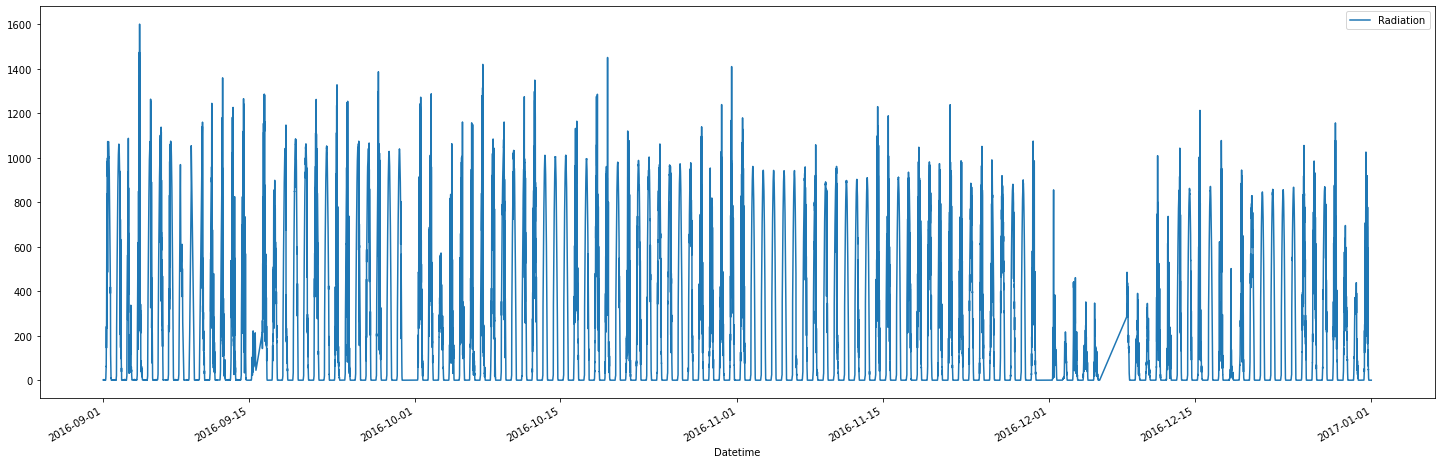

In [75]:
df_time.plot(figsize=(25,8))

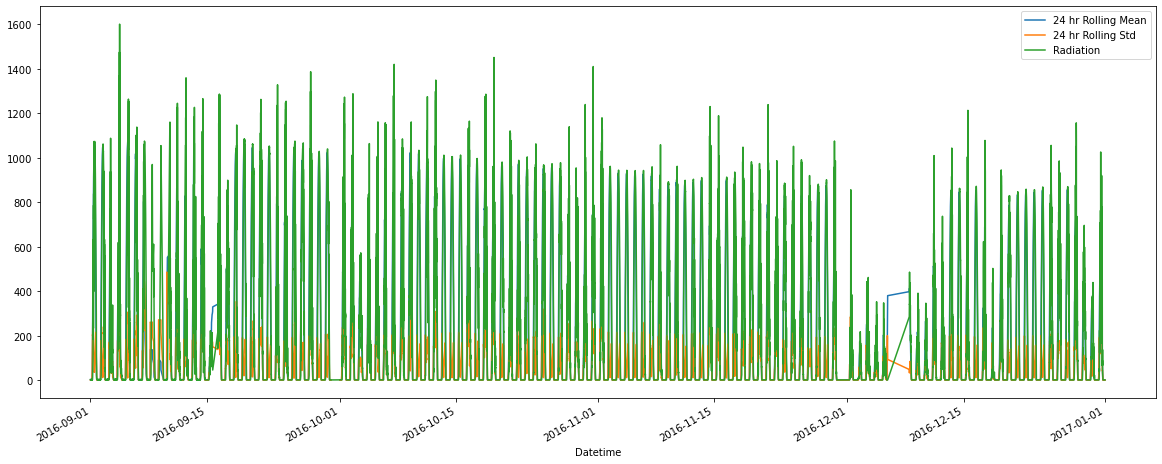

In [76]:
plt.figure(figsize=(20,8))
timeseries = df_time['Radiation']
timeseries.rolling(24).mean().plot(label='24 hr Rolling Mean')
timeseries.rolling(24).std().plot(label='24 hr Rolling Std')
timeseries.plot()
plt.legend(loc='best')

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [78]:
df_sort = df_time

In [79]:
df_sort.sort_index(inplace=True)

C:\Users\Swapnil\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


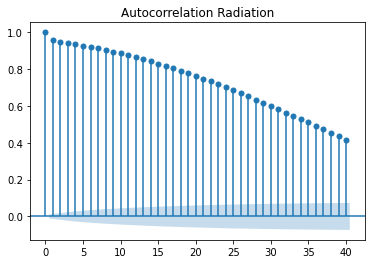

In [80]:
title = "Autocorrelation Radiation"
lags = 40
plot_acf(df_sort['Radiation'], title=title, lags = lags);

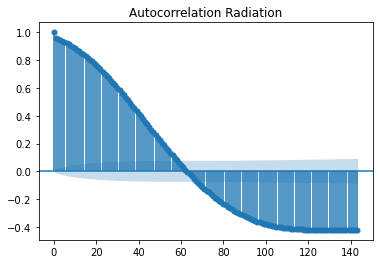

In [81]:
title = "Autocorrelation Radiation"
lags = 40
plot_acf(df_sort['Radiation'], title=title, lags = 143);

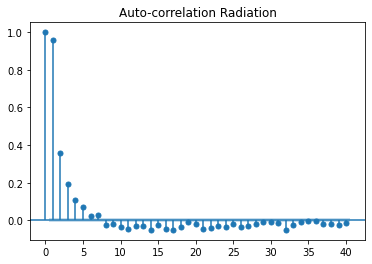

In [82]:
title = "Auto-correlation Radiation"
lags = 40
plot_pacf(df_sort['Radiation'], title=title, lags = lags);

C:\Users\Swapnil\AppData\Local\Temp/ipykernel_22496/3187470166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sort['first_Diff'] = df_sort['Radiation'] - df_sort['Radiation'].shift(1)


<AxesSubplot:xlabel='Datetime'>

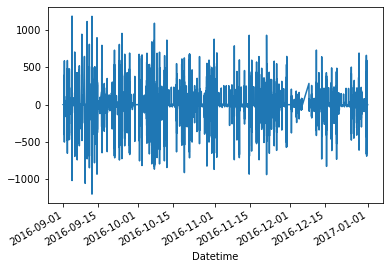

In [83]:
df_sort['first_Diff'] = df_sort['Radiation'] - df_sort['Radiation'].shift(1)
df_sort['first_Diff'].plot()

C:\Users\Swapnil\AppData\Local\Temp/ipykernel_22496/854232961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sort['Seasonal_first_diff'] = df_sort['first_Diff'] - df_sort['first_Diff'].shift(24)


<AxesSubplot:xlabel='Datetime'>

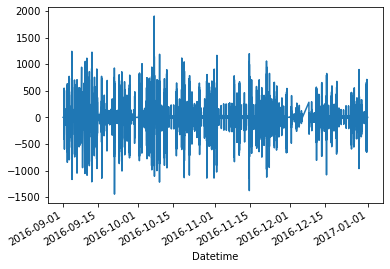

In [84]:
df_sort['Seasonal_first_diff'] = df_sort['first_Diff'] - df_sort['first_Diff'].shift(24)
df_sort['Seasonal_first_diff'].plot()

C:\Users\Swapnil\AppData\Local\Temp/ipykernel_22496/1945535349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sort['month-SMA'] = df_sort['Radiation'].rolling(window=12).mean()
C:\Users\Swapnil\AppData\Local\Temp/ipykernel_22496/1945535349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sort['month-Std'] = df_sort['Radiation'].rolling(window=12).std()


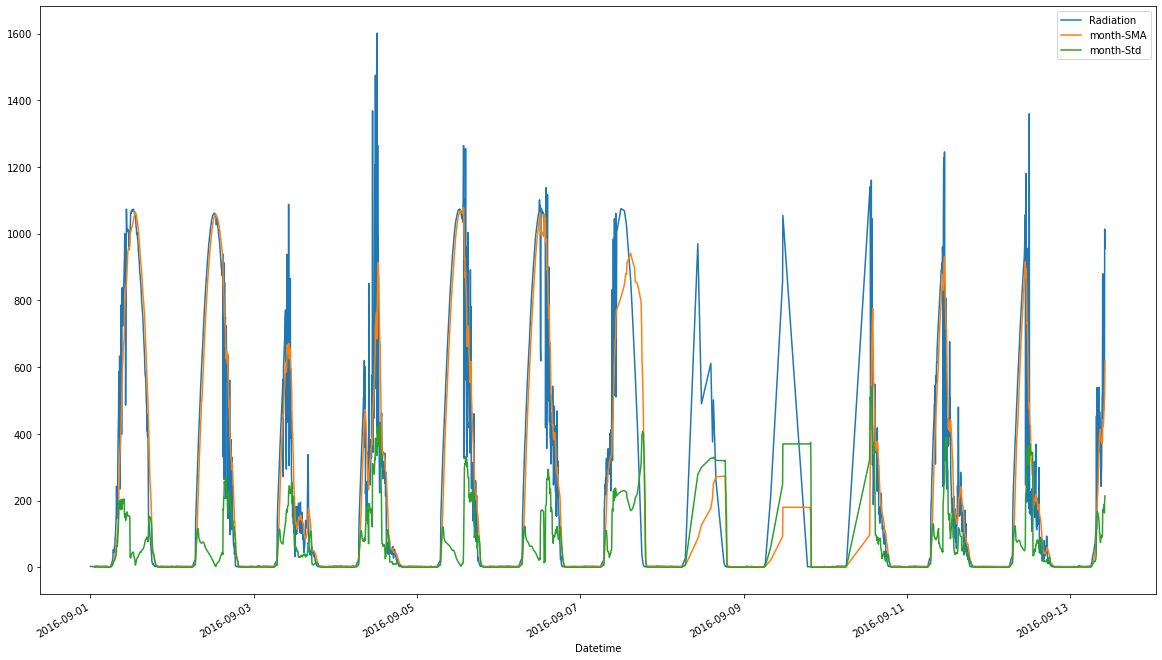

In [85]:
df_sort['month-SMA'] = df_sort['Radiation'].rolling(window=12).mean()
df_sort['month-Std'] = df_sort['Radiation'].rolling(window=12).std()

df_sort[['Radiation','month-SMA','month-Std']].head(3000).plot(figsize=(20,12));

<Figure size 1440x864 with 0 Axes>

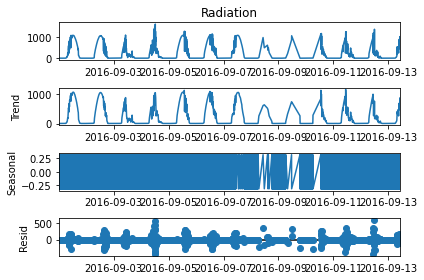

In [86]:
decomposition = seasonal_decompose(df_sort['Radiation'].head(3000), extrapolate_trend='freq', period=2)
plt.figure(figsize=(20,12))
decomposition.plot();

In [87]:
from statsmodels.tsa.stattools import adfuller

def adf_check(time_series):
    result = adfuller(time_series)
    print("Augmented Dickey-Fuller Test")
    labels = ['ADF Test Statistic ', 'p-value', '#Lags Used', 'Number of Observations Used']
    
    for value, label in zip(result, labels):
        print(label+' : ' +str(value))
        
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. data is stationary")
            
    else:
        print("weak evidence against null hypothesis, time series is non-stationary")

In [88]:
adf_check(df_sort['Radiation'])

Augmented Dickey-Fuller Test
ADF Test Statistic  : -23.773592416137298
p-value : 0.0
#Lags Used : 45
Number of Observations Used : 32640
Strong evidence against the null hypothesis, reject the null hypothesis. data is stationary


In [89]:
adf_check(df_sort['Seasonal_first_diff'].dropna())

Augmented Dickey-Fuller Test
ADF Test Statistic  : -33.012520323416155
p-value : 0.0
#Lags Used : 52
Number of Observations Used : 32608
Strong evidence against the null hypothesis, reject the null hypothesis. data is stationary


In [90]:
model = sm.tsa.statespace.SARIMAX(df_sort['Radiation'],order=(1,1,0), seasonal_decompose=(1,0,0,24))
result = model.fit()
print(result.summary())

C:\Users\Swapnil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Swapnil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:              Radiation   No. Observations:                32686
Model:               SARIMAX(1, 1, 0)   Log Likelihood             -190912.081
Date:                Fri, 16 Sep 2022   AIC                         381828.163
Time:                        00:15:47   BIC                         381844.952
Sample:                             0   HQIC                        381833.528
                              - 32686                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3688      0.002   -239.160      0.000      -0.372      -0.366
sigma2      6933.2758     13.295    521.501      0.000    6907.218    6959.333
Ljung-Box (L1) (Q):                 179.26   Jarque-

<AxesSubplot:xlabel='Datetime'>

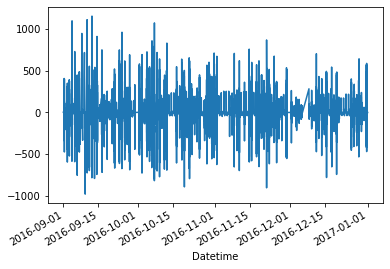

In [91]:
result.resid.plot()

C:\Users\Swapnil\AppData\Local\Temp/ipykernel_22496/3754496875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sort['predict'] = result.predict(start=25000, end=30000)


Text(0.5, 1.0, 'RMSE: 83.2637')

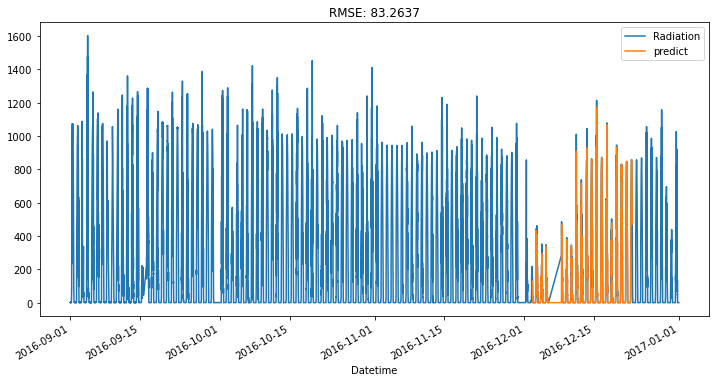

In [94]:
df_sort['predict'] = result.predict(start=25000, end=30000)
df_sort[['Radiation', 'predict']].plot(figsize=(12,6))
plt.title('RMSE: %.4f'% np.sqrt(sum((result.predict(start=0) - df_sort['Radiation']).dropna()**2/len(df_sort))))

In [95]:
predictions = result.predict(start=df_sort.shape[0],end=(df_sort.shape[0]+10), dynamic=False)

C:\Users\Swapnil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [96]:
predictions

32686    1.202625
32687    1.205345
32688    1.204342
32689    1.204711
32690    1.204575
32691    1.204625
32692    1.204607
32693    1.204614
32694    1.204611
32695    1.204612
32696    1.204612
Name: predicted_mean, dtype: float64

In [97]:
result.forecast(2016-12-31)

C:\Users\Swapnil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


32686    1.202625
32687    1.205345
32688    1.204342
32689    1.204711
32690    1.204575
32691    1.204625
32692    1.204607
32693    1.204614
32694    1.204611
32695    1.204612
32696    1.204612
32697    1.204612
32698    1.204612
32699    1.204612
32700    1.204612
32701    1.204612
32702    1.204612
32703    1.204612
32704    1.204612
32705    1.204612
32706    1.204612
32707    1.204612
32708    1.204612
32709    1.204612
32710    1.204612
32711    1.204612
32712    1.204612
32713    1.204612
32714    1.204612
32715    1.204612
32716    1.204612
32717    1.204612
32718    1.204612
32719    1.204612
32720    1.204612
32721    1.204612
32722    1.204612
32723    1.204612
32724    1.204612
32725    1.204612
32726    1.204612
32727    1.204612
32728    1.204612
32729    1.204612
32730    1.204612
32731    1.204612
32732    1.204612
32733    1.204612
32734    1.204612
32735    1.204612
32736    1.204612
32737    1.204612
32738    1.204612
32739    1.204612
32740    1.204612
32741    1

# Clustering

In [98]:
data['Datetime'] = '2016'+ '-' + data['Month'].map(str) +'-'+ data['Day'].map(str)  

In [99]:
data['Datetime'] = pd.to_datetime(data['Datetime'])

In [100]:
time_y = y.values.reshape(-1,1)

In [101]:
time_x = data.Datetime.values.reshape(-1,1)

In [102]:
time_x

array([['2016-09-29T00:00:00.000000000'],
       ['2016-09-29T00:00:00.000000000'],
       ['2016-09-29T00:00:00.000000000'],
       ...,
       ['2016-12-01T00:00:00.000000000'],
       ['2016-12-01T00:00:00.000000000'],
       ['2016-12-01T00:00:00.000000000']], dtype='datetime64[ns]')

In [103]:
pca = PCA(n_components=1).fit(time_y)
pca_d = pca.transform(time_y)
pca_c = pca.transform(time_x)

KMeans(n_clusters=3)


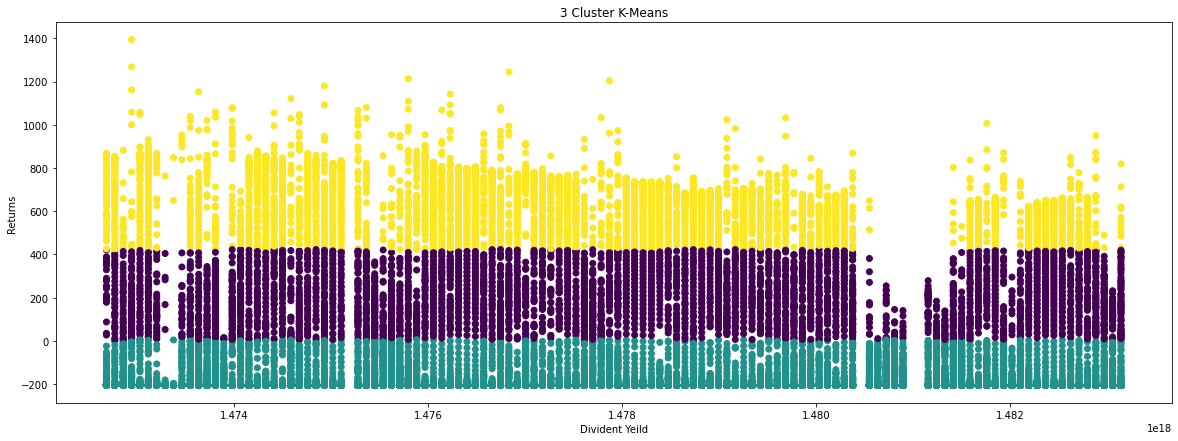

In [113]:
kmeans = KMeans(n_clusters=3)
kmeansoutput = kmeans.fit(time_y)
print(kmeansoutput)

plt.figure('3 Cluster K-Means',figsize=(20,7))
plt.scatter(pca_c, pca_d, c=kmeansoutput.labels_)
plt.xlabel('Divident Yeild')
plt.ylabel('Returns')
plt.title('3 Cluster K-Means')
plt.show()

In [105]:
time_data = data.values

In [114]:
kmeans = KMeans(n_clusters=5)

In [115]:
kmeans.fit(time_y)

KMeans(n_clusters=5)

In [116]:
kmeans.cluster_centers_

array([[935.89145074],
       [  8.92978152],
       [442.37679795],
       [220.20285   ],
       [698.8432125 ]])

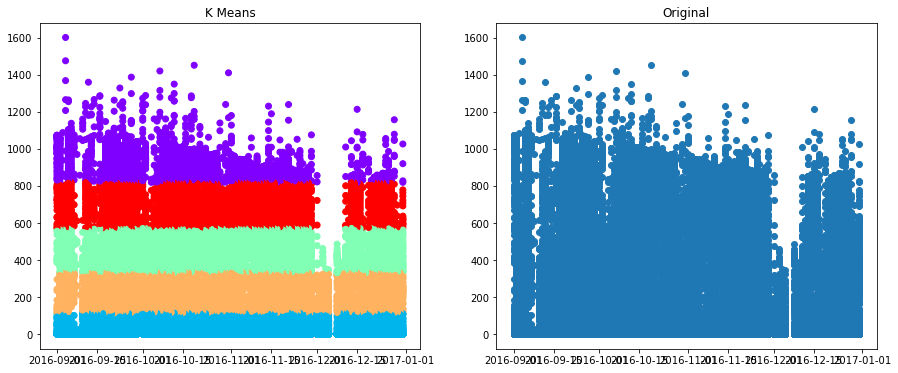

In [117]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.set_title("K Means")
ax1.scatter(time_data[:,15],time_data[:,1], c=kmeans.labels_, cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(time_data[:,15],time_data[:,1], cmap='rainbow')

In [118]:
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(time_y)
    sum_of_squared_distances.append(km.inertia_)

In [119]:
sum_of_squared_distances

[3262066405.482444,
 538723014.931757,
 196673314.37805504,
 113358937.02055618,
 73496661.27774778,
 51109958.52444067,
 37478702.53404634,
 29030945.217398193,
 23737063.943424996,
 19511299.467934847,
 16254546.001732085,
 13295978.177111834,
 11183768.257167483,
 9709391.515487079]

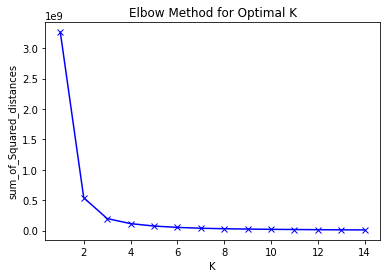

In [120]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel("K")
plt.ylabel("sum_of_Squared_distances")
plt.title("Elbow Method for Optimal K")
plt.show()

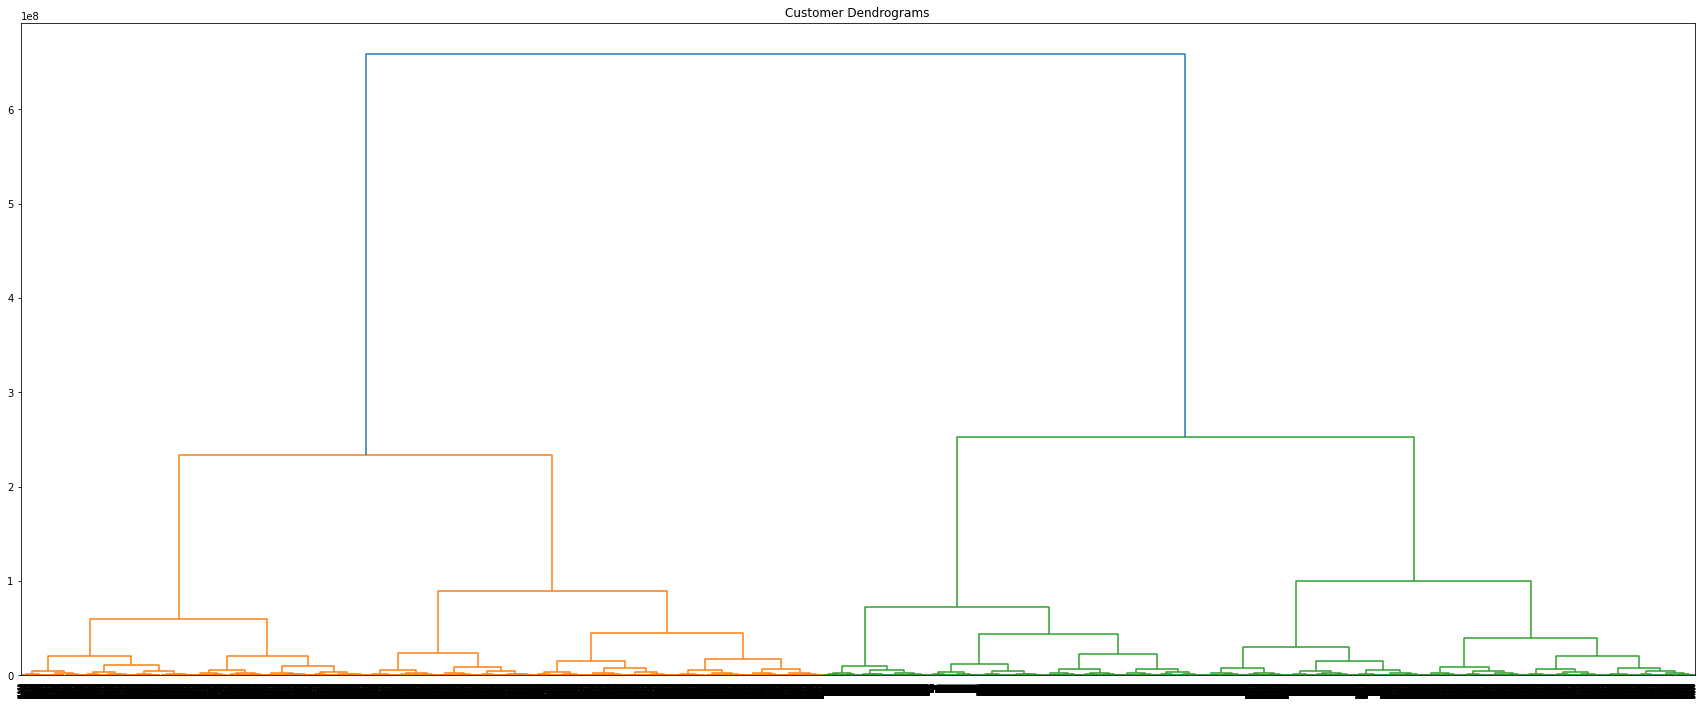

In [121]:
plt.figure(figsize=(30,12))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(x, method='ward'))

In [122]:
samples = x.values
mergings = linkage(samples, method='complete')

In [123]:
# Remove the Temperature from the DataFrame, save for later
d = data
varieties = list(d.pop('Temperature'))

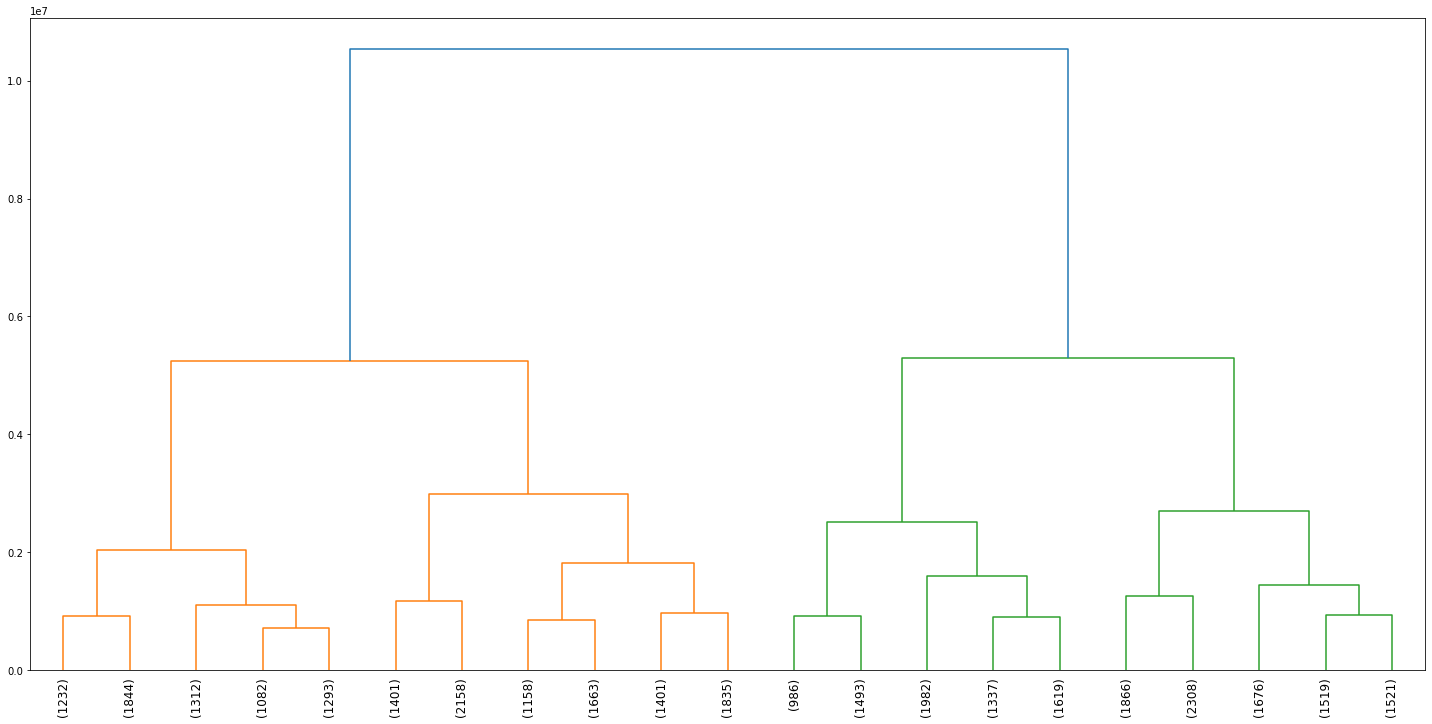

In [124]:
plt.figure(figsize=(25, 12))
dendrogram(mergings,
           p=21,
           truncate_mode='lastp',
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=12,
           )

plt.show()

# Evaluation of the model

In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test_data, predictions)
print('MSE error',error)

In [ ]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test_data, predictions)
print(f'SARIMAX(4,1,3)&(1, 0, [], 12) preictions RMSE Error: {error:11.10}')

# THANK YOU